# Interpreting an image for analysis

## Importing libraries and setting my image size

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sep
from astropy.io import fits
from matplotlib import rcParams

%matplotlib inline

rcParams['figure.figsize'] = [12., 12.]

## Importing image 

In [2]:
pic = fits.open(r'C:\Users\evacs\Downloads\hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits')

## Set image data into a 2-d array

In [3]:
data = pic[0].data

## Print image to the screen

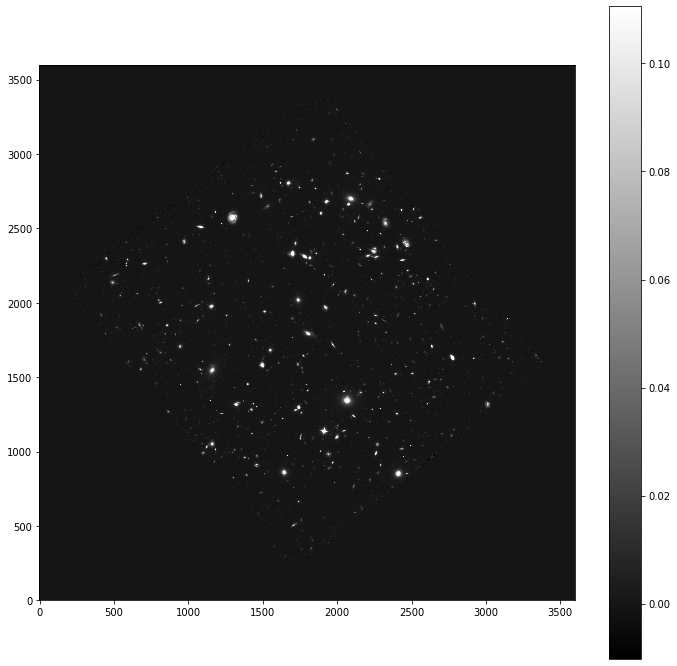

In [4]:
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-.2*s, vmax=m+2*s, origin='lower')
plt.colorbar();

## Measure a spatially varying background on the image

In [5]:
bkg = sep.Background(data = data.byteswap().newbyteorder())

## Print mean and noise from image

In [6]:
print(bkg.globalback)
print(bkg.globalrms)

0.0
0.0005398219218477607


## Evaluate background as 2-d array

In [7]:
bkg_image = bkg.back()

## Show only the background 

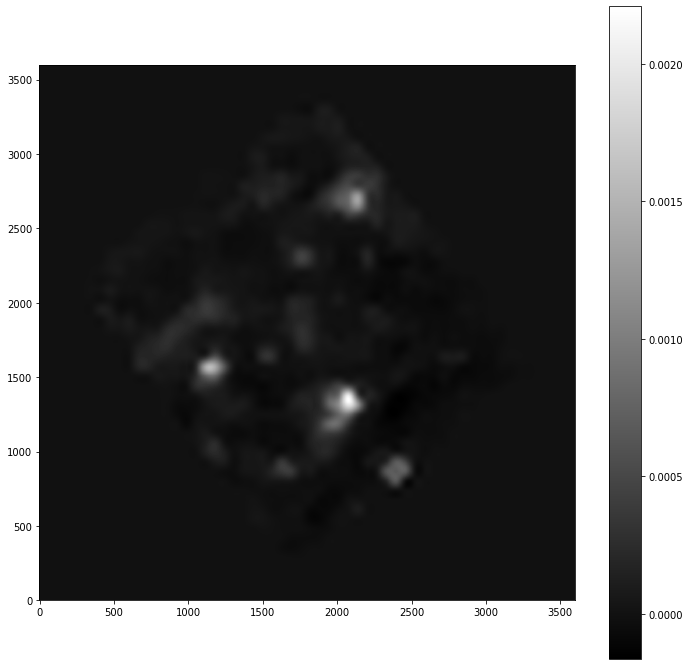

In [8]:
plt.imshow(bkg_image , interpolation='nearest' , cmap='gray' , origin='lower')
plt.colorbar()

## Evaluate background NOISE as 2-d array

In [9]:
bkg_rms = bkg.rms()

## Show only the background NOISE

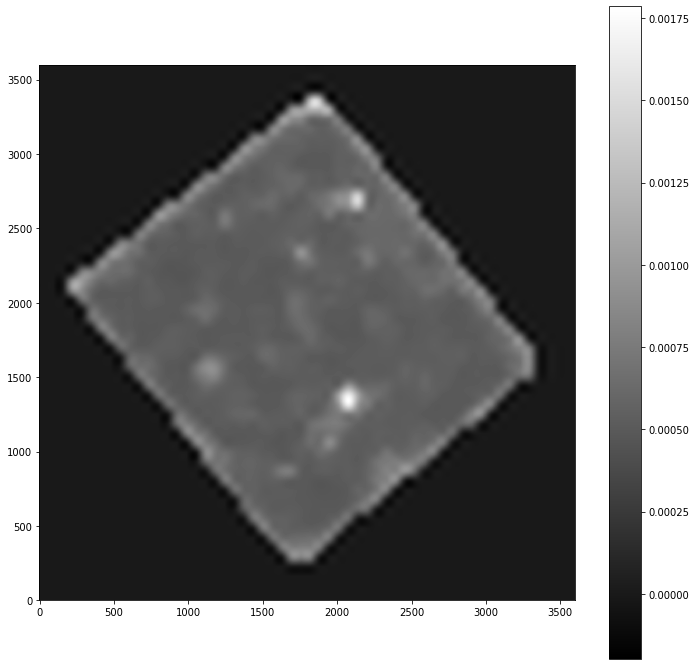

In [10]:
plt.imshow(bkg_rms , interpolation='nearest' , cmap='gray' , origin='lower')
plt.colorbar()

## Subtract the background noise from the image

In [11]:
data_sub = data - bkg

## Detect objects in image

In [12]:
objects = sep.extract(data_sub, 6, err=bkg.globalrms)
len(objects)

2253

## Show detected objects indicated with purple ellipses

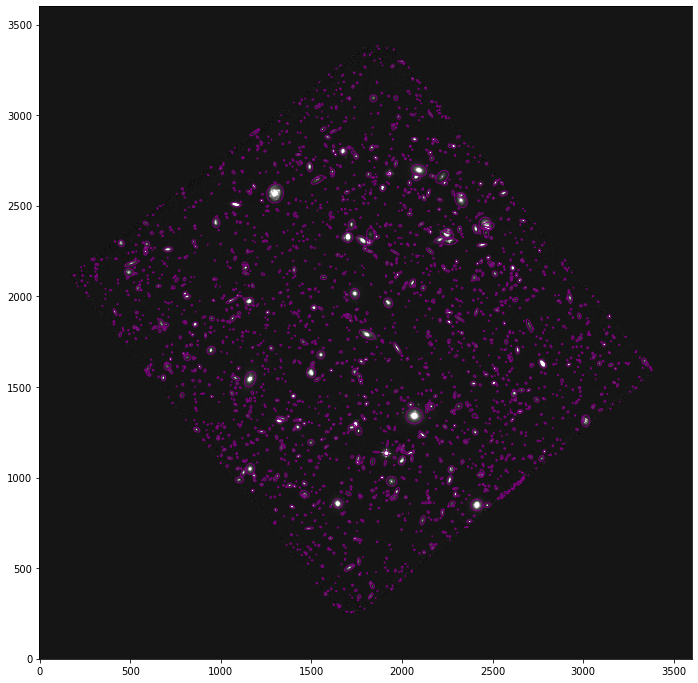

In [13]:
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-.2*s, vmax=m+2*s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('purple')
    ax.add_artist(e)